In [1]:
import sys
sys.path.insert(1, '../GBT_pipeline')
from synthetic import create_true, create_full_cadence, create_false, create_true_single_shot
import matplotlib.pyplot as plt
import numpy as np 
from single_search import search
from execute_model import model_load
import tensorflow as tf

In [2]:
NUM_SAMPLES = 10
factor =10

print("Loading in plate")
plate = np.load('../../filtered.npy')
print("Creating False")

false_data = create_full_cadence(create_false, plate = plate, samples = NUM_SAMPLES, snr_base=300, snr_range=20)
print("Creating True")

true_data = create_full_cadence(create_true, plate = plate, samples = NUM_SAMPLES, snr_base=300, snr_range=20, factor=factor)
print("Creating Single Shot True")

true_single_shot = create_full_cadence(create_true_single_shot, plate = plate, samples = NUM_SAMPLES, snr_base=300, snr_range=20,factor=factor)


Loading in plate
Creating False
Creating True
Creating Single Shot True


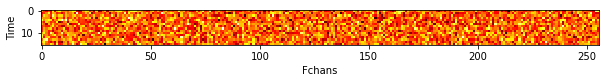

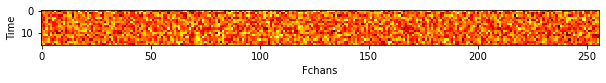

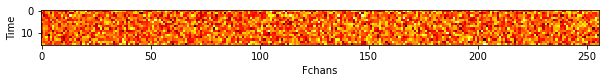

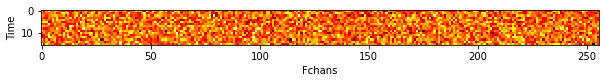

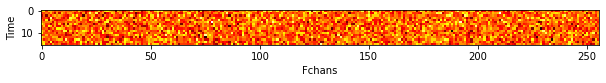

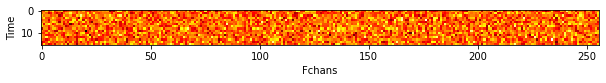

In [3]:
%matplotlib inline
import random 
for i in range(6):
    plt.figure(figsize=(10,4))
    plt.xlabel("Fchans")
    plt.ylabel("Time")
    plt.imshow(false_data[1,i,:,:], interpolation='nearest', cmap=plt.get_cmap('hot'))
    plt.show()

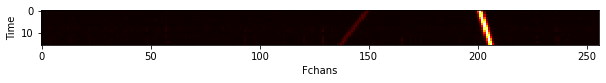

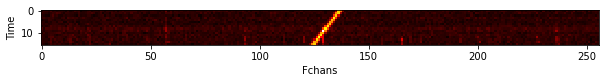

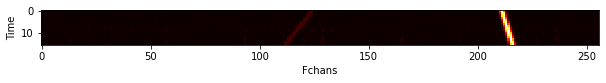

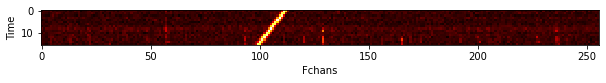

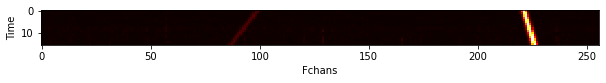

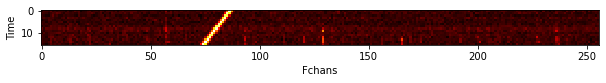

In [4]:
%matplotlib inline
import random 
for i in range(6):
    plt.figure(figsize=(10,4))
    plt.xlabel("Fchans")
    plt.ylabel("Time")
    plt.imshow(true_data[1,i,:,:], interpolation='nearest', cmap=plt.get_cmap('hot'))
    plt.show()

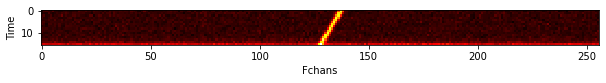

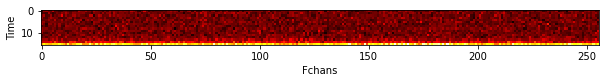

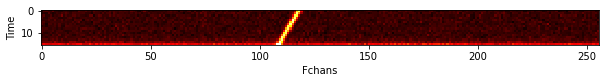

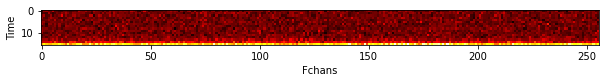

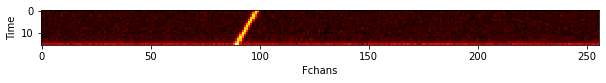

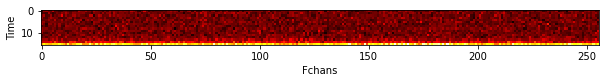

In [5]:
%matplotlib inline
import random 
for i in range(6):
    plt.figure(figsize=(10,4))
    plt.xlabel("Fchans")
    plt.ylabel("Time")
    plt.imshow(true_single_shot[1,i,:,:], interpolation='nearest', cmap=plt.get_cmap('hot'))
    plt.show()

In [7]:
print("Load Model")

model = model_load("VAE-ENCODERv9.h5")

print("Search False")
search(false_data, model, False)

print("Search True")
search(true_data, model, True)

print("Search True Single Shot")
search(true_single_shot, model, True)

Load Model
tensorflow      INFO     Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3')
tensorflow      WARNING  No training configuration found in the save file, so the model was *not* compiled. Compile it manually.
Search False
Collapse Data
Push Through Neural Net


UnknownError: 4 root error(s) found.
  (0) Unknown:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node replica_2/encoder/conv2d_45/Conv2D (defined at /usr/lib/python3.6/threading.py:916) ]]
  (1) Unknown:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node replica_2/encoder/conv2d_45/Conv2D (defined at /usr/lib/python3.6/threading.py:916) ]]
	 [[encoder/z_mean/BiasAdd/_107]]
  (2) Unknown:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node replica_2/encoder/conv2d_45/Conv2D (defined at /usr/lib/python3.6/threading.py:916) ]]
	 [[GroupCrossDeviceControlEdges_2/Identity_6/_187]]
  (3) Unknown:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node replica_2/encoder/conv2d_45/Conv2D (defined at /usr/lib/python3.6/threading.py:916) ]]
	 [[replica_2/encoder/z_mean/BiasAdd/_139]]
0 successful operations.
0 derived errors ignored. [Op:__inference_predict_function_1878]

Errors may have originated from an input operation.
Input Source operations connected to node replica_2/encoder/conv2d_45/Conv2D:
 cond_6/Identity (defined at ../GBT_pipeline/single_search.py:66)

Input Source operations connected to node replica_2/encoder/conv2d_45/Conv2D:
 cond_6/Identity (defined at ../GBT_pipeline/single_search.py:66)

Input Source operations connected to node replica_2/encoder/conv2d_45/Conv2D:
 cond_6/Identity (defined at ../GBT_pipeline/single_search.py:66)

Input Source operations connected to node replica_2/encoder/conv2d_45/Conv2D:
 cond_6/Identity (defined at ../GBT_pipeline/single_search.py:66)

Function call stack:
predict_function -> predict_function -> predict_function -> predict_function
